# Jobsheet 12
## Kelompok 6
### Aldin Ariel Pramudya (2141720233)
### Aryo Deva Saputra (2141720176)
### Muhammad Ega Rama Fernanda (2141720143)
Kelas : 3D

Prodi : D-IV Teknik Inormatika

Jurusan : Teknologi Inormasi

Politeknik Negeri Malang

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

## No 2 Face Detection

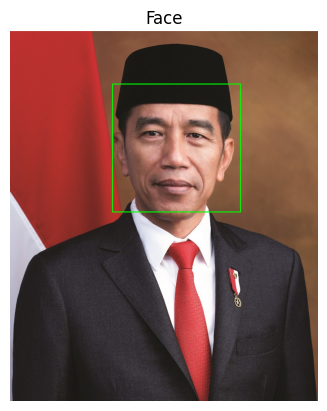

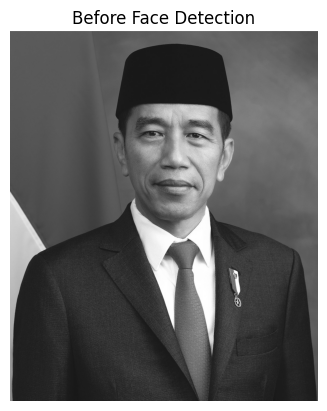

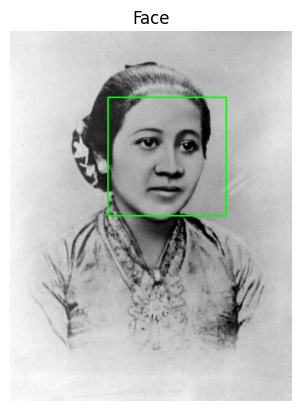

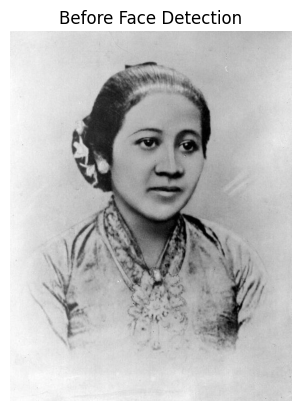

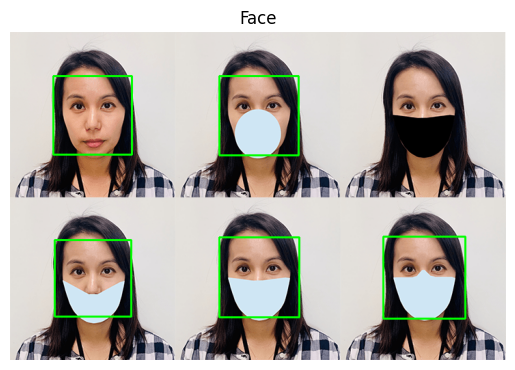

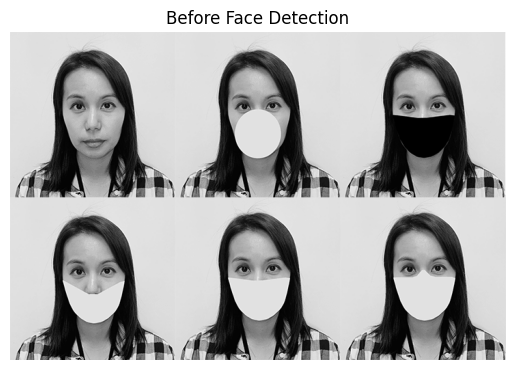

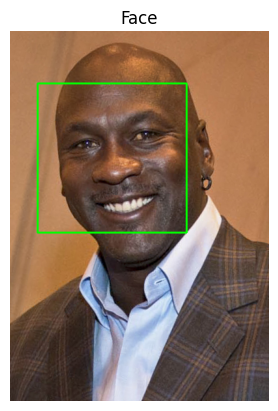

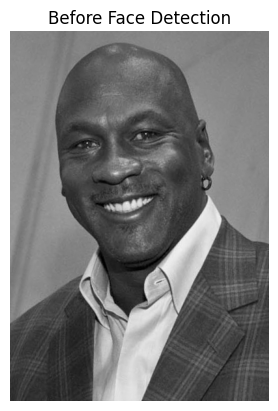

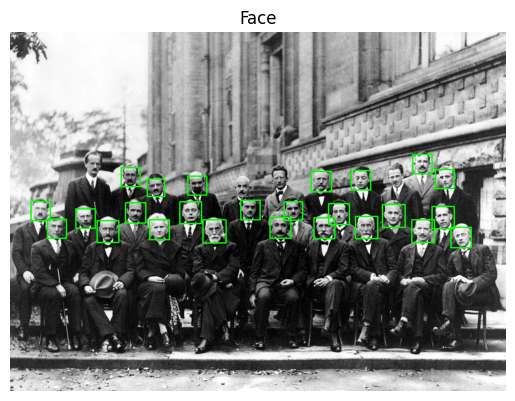

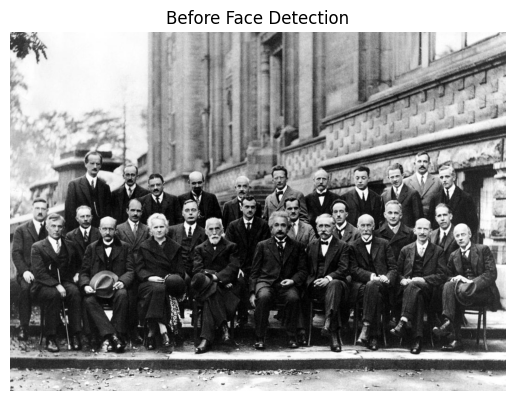

In [17]:
import cv2
from matplotlib import pyplot as plt

# Fungsi untuk menampilkan gambar dengan matplotlib
def display_image(img, title):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load gambar
image_path = [
    '/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/jokowi.jpg',
    '/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/kartini.jpg',
    '/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/mask.png',
    '/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/mjordan.jpg',
    '/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/solvayconf.jpg',
]

for images in image_path:
  original_image = cv2.imread(images)
  face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/haarcascade_frontalface_alt.xml')
  gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
  for (x, y, w, h) in faces:
    cv2.rectangle(original_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  display_image(original_image, 'Face')
  display_image(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), 'Before Face Detection')

## No 3 Cat Detection

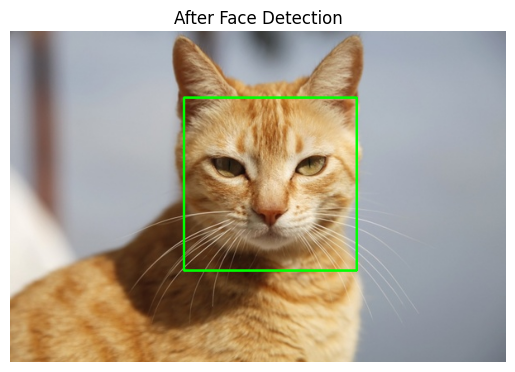

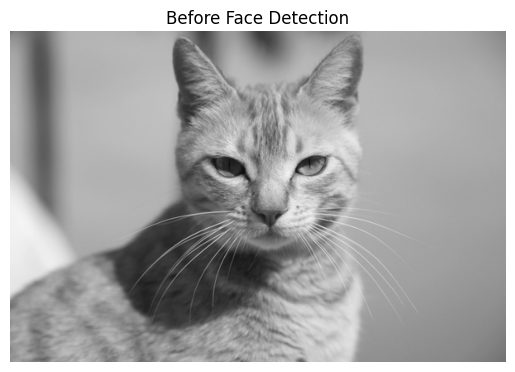

In [18]:
import cv2
from matplotlib import pyplot as plt

# Fungsi untuk menampilkan gambar dengan matplotlib
def display_image(img, title):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load gambar
image_path = '/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/mycat.jpg'
original_image = cv2.imread(image_path)

# Inisialisasi face cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/haarcascade_frontalcatface.xml')

# Konversi gambar ke skala abu-abu (diperlukan untuk deteksi wajah)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Deteksi wajah
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Gambar kotak di sekitar wajah yang terdeteksi
for (x, y, w, h) in faces:
    cv2.rectangle(original_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Tampilkan gambar sebelum dan sesudah face detection
display_image(original_image, 'After Face Detection')
display_image(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), 'Before Face Detection')


## No 4 Eye Detection

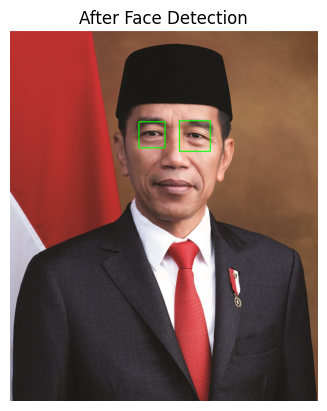

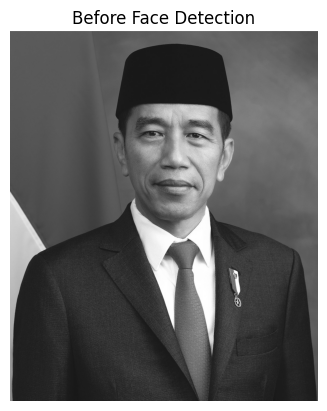

In [19]:
import cv2
from matplotlib import pyplot as plt

# Fungsi untuk menampilkan gambar dengan matplotlib
def display_image(img, title):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load gambar
image_path = '/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/jokowi.jpg'
original_image = cv2.imread(image_path)

# Inisialisasi face cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/haarcascade_eye.xml')

# Konversi gambar ke skala abu-abu (diperlukan untuk deteksi wajah)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Deteksi wajah
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Gambar kotak di sekitar wajah yang terdeteksi
for (x, y, w, h) in faces:
    cv2.rectangle(original_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Tampilkan gambar sebelum dan sesudah face detection
display_image(original_image, 'After Face Detection')
display_image(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), 'Before Face Detection')


## No 5 Live Recognition

In [24]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [25]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/haarcascade_frontalface_alt.xml')

In [26]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [27]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


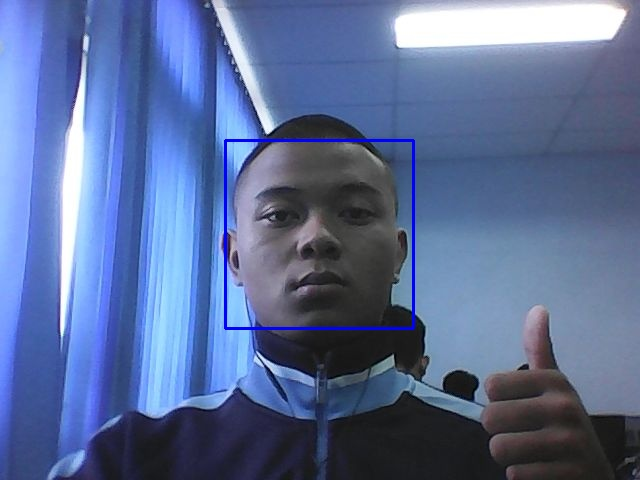

In [28]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## No 6 Face Detection M Jordan

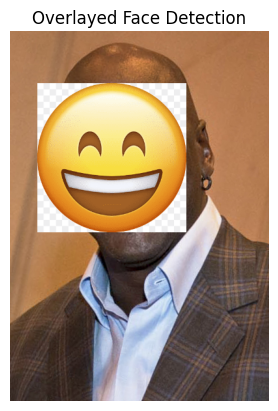

In [29]:
import cv2
from matplotlib import pyplot as plt

# Fungsi untuk menampilkan gambar dengan matplotlib
def display_image(img, title):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load gambar wajah dan gambar yang akan ditindihkan
face_image = cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/mjordan.jpg')
overlay_image = cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/smile.png')

# Inisialisasi face cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/haarcascade_frontalface_alt.xml')

# Deteksi wajah pada gambar wajah
faces = face_cascade.detectMultiScale(face_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Copy gambar wajah
result_image = face_image.copy()

# Menindihkan bagian deteksi wajah dengan gambar lain
for (x, y, w, h) in faces:
    # Resize gambar yang akan ditindihkan sesuai dengan ukuran wajah
    overlay = cv2.resize(overlay_image, (w, h))

    # Menindihkan gambar
    result_image[y:y+h, x:x+w] = overlay

# Tampilkan gambar hasil
display_image(result_image, 'Overlayed Face Detection')


## No 7

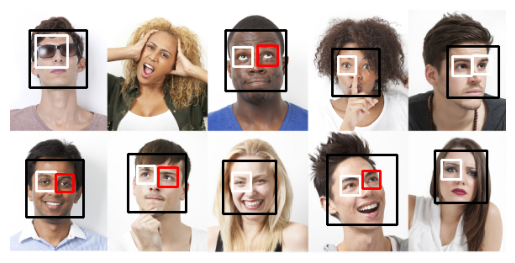

In [30]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar
people_img = cv.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/people.jpg')
people_gray = cv.cvtColor(people_img, cv.COLOR_BGR2GRAY)

# Ganti path ke file classifier Haar Cascade yang benar
face_cascade_path = '/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/haarcascade_frontalface_alt.xml'
eye_cascade_path = '/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 12/Face Detection/haarcascade_eye.xml'

# Gunakan classifier wajah
face_cascade = cv.CascadeClassifier(face_cascade_path)

# Gunakan classifier mata
eye_cascade = cv.CascadeClassifier(eye_cascade_path)

# Gunakan detector wajah
faces = face_cascade.detectMultiScale(people_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Loop melalui wajah yang terdeteksi
for (x, y, w, h) in faces:
    cv.rectangle(people_img, (x, y), (x+w, y+h), (0, 0, 0), 2)  # Bounding box wajah berwarna hitam

    # Dapatkan ROI (Region of Interest) untuk deteksi mata
    roi_gray = people_gray[y:y+h, x:x+w]
    roi_color = people_img[y:y+h, x:x+w]

    # Gunakan detector mata
    eyes = eye_cascade.detectMultiScale(roi_gray)

    # Loop melalui mata yang terdeteksi
    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 2)  # Bounding box mata berwarna putih

        # Deteksi mata kanan
        if ex > w/2:
            cv.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)  # Bounding box mata kanan berwarna merah

# Tampilkan gambar
plt.imshow(cv.cvtColor(people_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()